In [153]:
from importlib import reload
import src.data
import src.graph_utils
import cascade_failure.simple_cascade
import src.visualization
import src.atack
reload(cascade_failure.simple_cascade)
reload(src.data)
reload(src.graph_utils)
reload(src.visualization)
reload(src.atack)

from src.data import load_data, save_nodes, load_data_with_attributes
from src.graph_utils import assign_atributes
from src.visualization import draw_graph_after_failure, draw_graph
from cascade_failure.simple_cascade import cascade_failure_equal_load_distribution, cascade_failure_proportional_load_distribution
from src.atack import random_node_attack, high_degree_node_attack, high_load_capacity_ratio_node_attack

In [147]:
G = load_data()
assign_atributes(G)

Graph loaded: 4941 nodes, 6594 edges


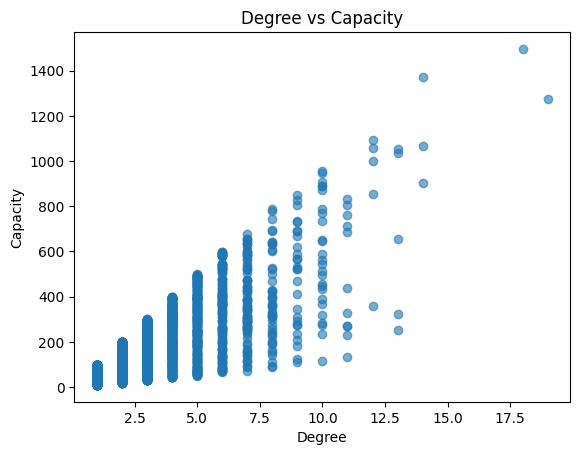

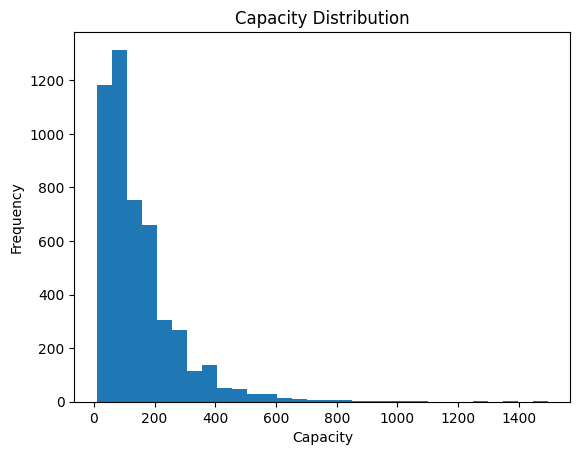

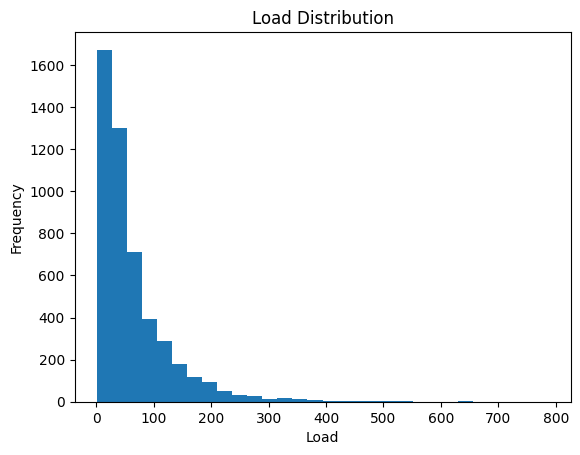

In [135]:
import matplotlib.pyplot as plt

degrees = [G.degree(n) for n in G.nodes()]
capacities = [G.nodes[n]["capacity"] for n in G.nodes()]
loads = [G.nodes[n]["load"] for n in G.nodes()]

# Degree vs Capacity
plt.scatter(degrees, capacities, alpha=0.6)
plt.xlabel("Degree")
plt.ylabel("Capacity")
plt.title("Degree vs Capacity")
plt.show()

plt.hist(capacities, bins=30)
plt.title("Capacity Distribution")
plt.xlabel("Capacity")
plt.ylabel("Frequency")
plt.show()

plt.hist(loads, bins=30)
plt.title("Load Distribution")
plt.xlabel("Load")
plt.ylabel("Frequency")
plt.show()


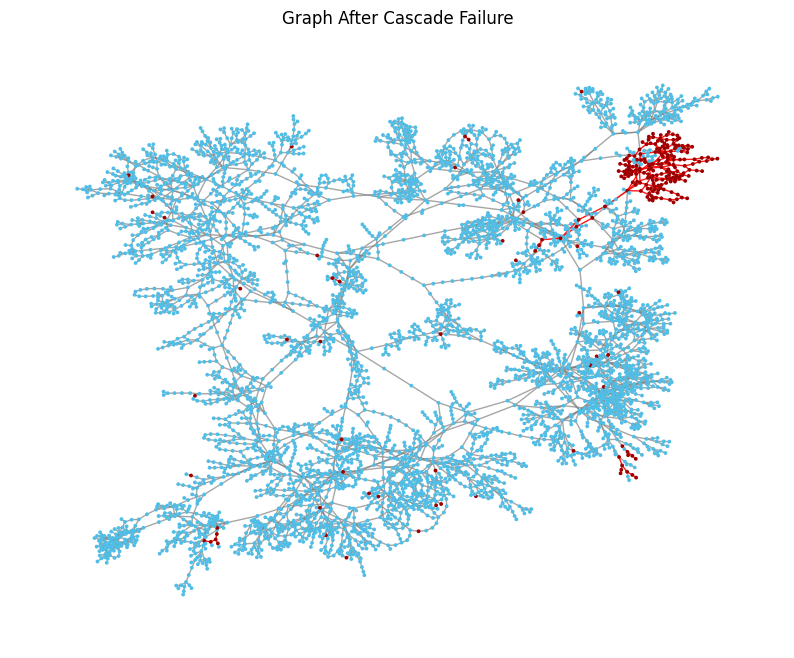

Number of failed nodes: 244
Number of intact nodes: 4697
Total nodes: 4941


In [148]:
attacked_nodes = high_load_capacity_ratio_node_attack(G, number_of_nodes=50)
G_after_failure = cascade_failure_proportional_load_distribution(G, attacked_nodes)
draw_graph_after_failure(G_after_failure, title="Graph After Cascade Failure")
print("Number of failed nodes:", sum(1 for n in G_after_failure.nodes() if G_after_failure.nodes[n]["failed"]))
print("Number of intact nodes:", sum(1 for n in G_after_failure.nodes() if not G_after_failure.nodes[n]["failed"]))
print("Total nodes:", G_after_failure.number_of_nodes())